# Exercise 1: fitting supernova light curves  
Download the file “sn00fa_ubvri.snphot.dat” from the course web site. It is a text table containing UBVRI light curve data (magnitude vs. time) for the Type Ia supernova SN2000fa from Jha et al. (2006).  

1. Read in the table using your method of choice (e.g. `numpy.genfromtxt` or `astropy.io.ascii.read`). For this exercise we want the columns HJD, R (R magnitude) and Rerr (its uncertainty).


In [23]:
## Code Here
from astropy.io import ascii
super = ascii.read("sn00fa.ubvri.snphot.dat", delimiter = " ",header_start = 3, data_start=0)
HJD = super["HJD"]
R = super["R"]
Rerr = super['+/-_3']

2. Select Julian dates (“HJD”) between 2451900 and 2451990.


In [24]:
## Code Here
mask = (HJD > 2451900) & (HJD < 2451990)
HJDmasked = HJD[mask]

3. Using `scipy.stats.linregress`, fit a line to the R magnitude as a function of Julian date. Hint: the fitted intercepts will be much more reliable & numerically stable if you subtract the mean date before fitting.


In [25]:
## Code Here
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

Rmasked = R[mask]
HJDcorrected = HJDmasked - np.mean(HJDmasked)

4. Plot the R-band flux versus time as points and the fit line with a solid line. Report the slope and its uncertainty (with units!).


Text(0.5, 1.0, 'R magnitude vs HJD')

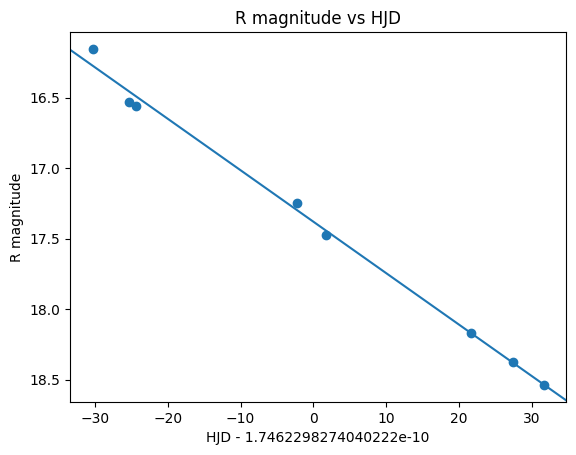

In [26]:
## Code Here
r = linregress(HJDcorrected,Rmasked)
plt.scatter(HJDcorrected,Rmasked)
plt.gca().invert_yaxis()
plt.axline((0,r.intercept),slope = r.slope)
plt.xlabel(f'HJD - {np.mean(HJDcorrected)}')
plt.ylabel('R magnitude')
plt.title('R magnitude vs HJD')

5. Illustrate the uncertainty in the fit parameters as follows: draw 500 random values for the slope and intercept of the line. These values should be drawn from normal (Gaussian) distributions with means and standard deviations given by the fit parameters and their uncertainties. Construct 500 new lines from these samples and plot them on your figure.


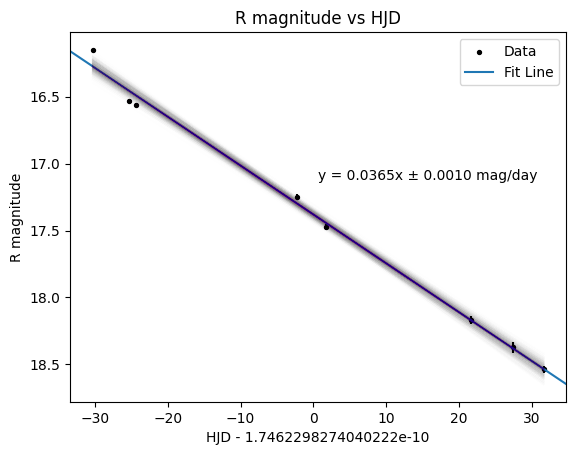

In [27]:
## Code Here
y = np.random.normal(loc = r.intercept,scale = r.intercept_stderr,size=500)
slope_ = np.random.normal(loc = r.slope,scale = r.stderr,size=500)

plt.errorbar(HJDcorrected,Rmasked,yerr=Rerr[mask],fmt='none',c='black')
plt.scatter(HJDcorrected,Rmasked,color = "black",s=8, label = "Data")
plt.text(0.5,0.6,'y = {:.4f}x ± {:.4f} mag/day'.format(r.slope,r.stderr),transform =plt.gca().transAxes)
plt.gca().invert_yaxis()
plt.axline((0,r.intercept),slope = r.slope, label = "Fit Line")
plt.xlabel(f'HJD - {np.mean(HJDcorrected)}')
plt.ylabel('R magnitude')
plt.title('R magnitude vs HJD')
plt.legend()
for i in range(500):
    plt.plot(HJDcorrected,slope_[i]*HJDcorrected + y[i],alpha = .005, c = "purple")

# Exercise 2: galaxy cluster X-ray surface brightness  
Download the file “abell1995_laroque2006.dat” from the course web site. This file contains the X-ray surface brightness profile of the cluster Abell 1995 as derived from Chandra X-ray observations in LaRoque et al. 2006, 652, 917.  

1. Read the radius, surface brightness, and surface brightness error from this file using your favorite text file reader.  




In [28]:
## Code Here
xray = ascii.read("abell1995_laroque2006.dat", header_start = 8,data_start = 0)
Rad = xray["radius"]
brt = xray["surf_brt"]
err = xray["err"]

2. Fit the “isothermal beta model” profile to these data:

$$
S_X(r) = S_{X0} \left[1 + \left(\frac{r}{r_c}\right)^2\right]^{(1-6)\beta/2}
$$

Here $S_{X0}$, $r_c$, and $\beta$ are the fitting parameters. Report your best-fit values and the error in each parameter. How do your results compare to LaRoque et al.? ($r_c \approx 235$ kpc, $\beta \approx 0.921$) You need starting guesses; try $S_{X0} = 10^{-3}$ cts/s/arcmin$^2$, $r_c = 20$ kpc, and $\beta = 0.5$.



In [29]:
## Code Here
from scipy.optimize import curve_fit
def isobeta(R,SX0,Rc,B):
    return SX0*(1+(R/Rc)**2)**(1-6*B)/2
guess = [1e-3,20,.5]

popt, pcov = curve_fit(isobeta,Rad,brt,p0=guess)
SX0fit, Rcfit, betafit = popt
SX0err, Rcerr, betaerr = np.sqrt(np.diag(pcov))

3. Plot the data and the best-fit curve. Illustrate the fit uncertainties with 500 additional curves drawn from the fit parameters, using the same techniques as for Exercise 1.


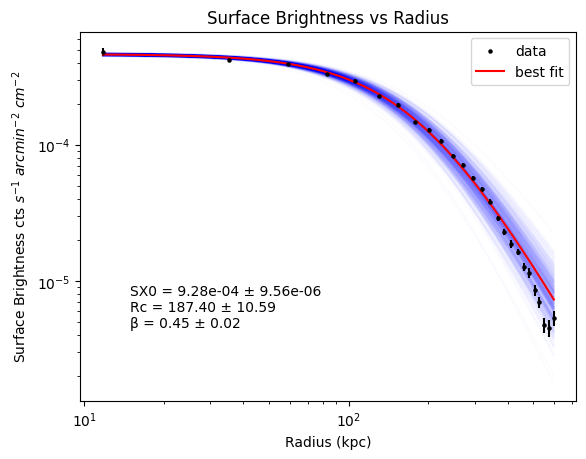

In [30]:
## Code Here
plt.scatter(Rad,brt,zorder = 20,s=5,c='black',label = "data")
plt.errorbar(Rad,brt,yerr = err, fmt ='none', c = 'black', zorder = 10)
plt.loglog()
Rfit = np.linspace(np.min(Rad),np.max(Rad),1000)
Ifit = isobeta(Rfit,SX0fit,Rcfit, betafit)

randomSX0 = np.random.normal(SX0fit, SX0err,500)
randomRc = np.random.normal(Rcfit,Rcerr,500)
randomB = np.random.normal(betafit,betaerr,500)
for i in range (500):
    randI = isobeta(Rfit,randomSX0[i],randomRc[i],randomB[i])
    plt.plot(Rfit, randI,'b', zorder = 0,alpha = .01)
plt.plot(Rfit,Ifit, 'r',label = "best fit", zorder= 10)
plt.xlabel('Radius (kpc)')
plt.ylabel(r'Surface Brightness cts $s^{-1}$ $arcmin^{-2}$ $cm^{-2}$')
plt.title('Surface Brightness vs Radius')
plt.text(0.1,0.2,f"SX0 = {SX0fit:.2e} ± {SX0err:.2e}\nRc = {Rcfit:.2f} ± {Rcerr:.2f}\nβ = {betafit:.2f} ± {betaerr:.2f}",transform=plt.gca().transAxes)
plt.legend()
plt.show()

In [31]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='./drive/MyDrive/' './drive/MyDrive/Colab Notebooks/lec24_ASTR310.ipynb' --to pdf

ModuleNotFoundError: No module named 'google.colab'